In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.2)
sns.set_palette('bright')
plt.rcParams['figure.figsize']=15, 10

In [2]:
# importing the dataset
basedir = os.path.abspath(os.path.dirname('__file__'))
filename = basedir+ '/pages/data/diamonds.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* No as such anomaly in datatypes.
* There is no null values as well here.

In [6]:
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [7]:
# pushing price to the extreme end for my ease as its the target variable.
df = pd.concat([df.drop('price', axis=1), df.price], axis=1)

## Univariate analysis

In [8]:
for i, col in enumerate(df.select_dtypes(include='object')):
    print(i, col)

0 cut
1 color
2 clarity


In [9]:
import plotly.express as px

In [10]:

px.histogram(df, x= 'cut', title='Cut wise distribution').update_xaxes(categoryorder='total descending')


In [11]:
px.histogram(df, x= 'color', labels={'cut':'CUT'}, title='Color wise distribution').update_xaxes(categoryorder = 'total descending')

In [12]:
px.histogram(df, x= 'clarity', title= 'Distribution across clarity').update_xaxes(categoryorder='total descending')


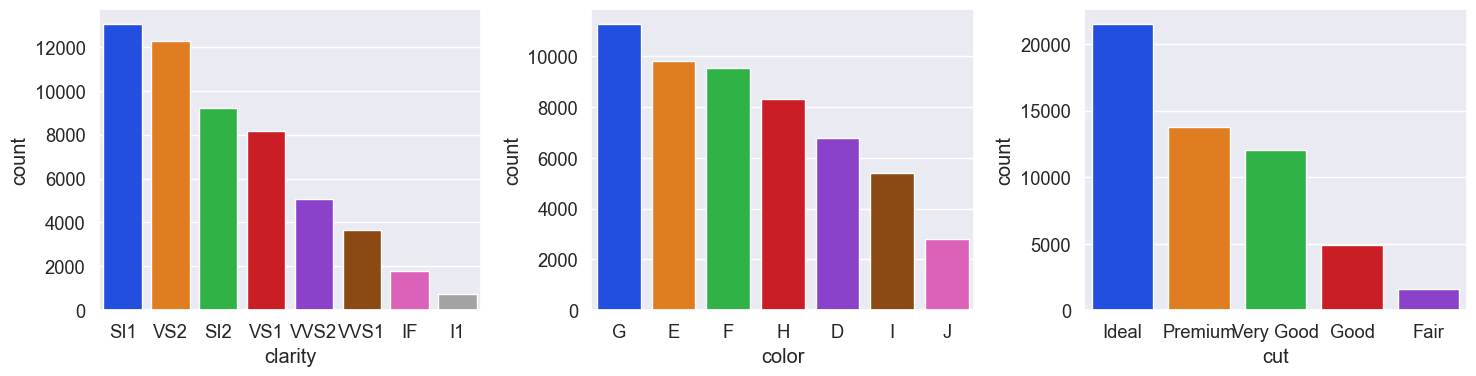

In [13]:
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.countplot(data=df, x='clarity', order=df.groupby('clarity').count().x.sort_values(ascending=False).index)

plt.subplot(132)
sns.countplot(data=df, x='color', order=df.groupby('color').count().x.sort_values(ascending=False).index)

plt.subplot(133)
sns.countplot(data=df, x='cut', order=df.groupby('cut').count().x.sort_values(ascending=False).index)
plt.tight_layout()



* The number of SI1 clarity diamonds are most common and I1 quality diamonds are rare.
* Most of the diamond are of G, E, F color.
* Most of the diamonds have ideal cut followed by premium cut followed by very good cut.

In [14]:
px.bar(df.groupby('cut').median().price, labels={'value': 'Median Price'}, text_auto=True ).update_layout(showlegend=False).update_xaxes(categoryorder='total descending')

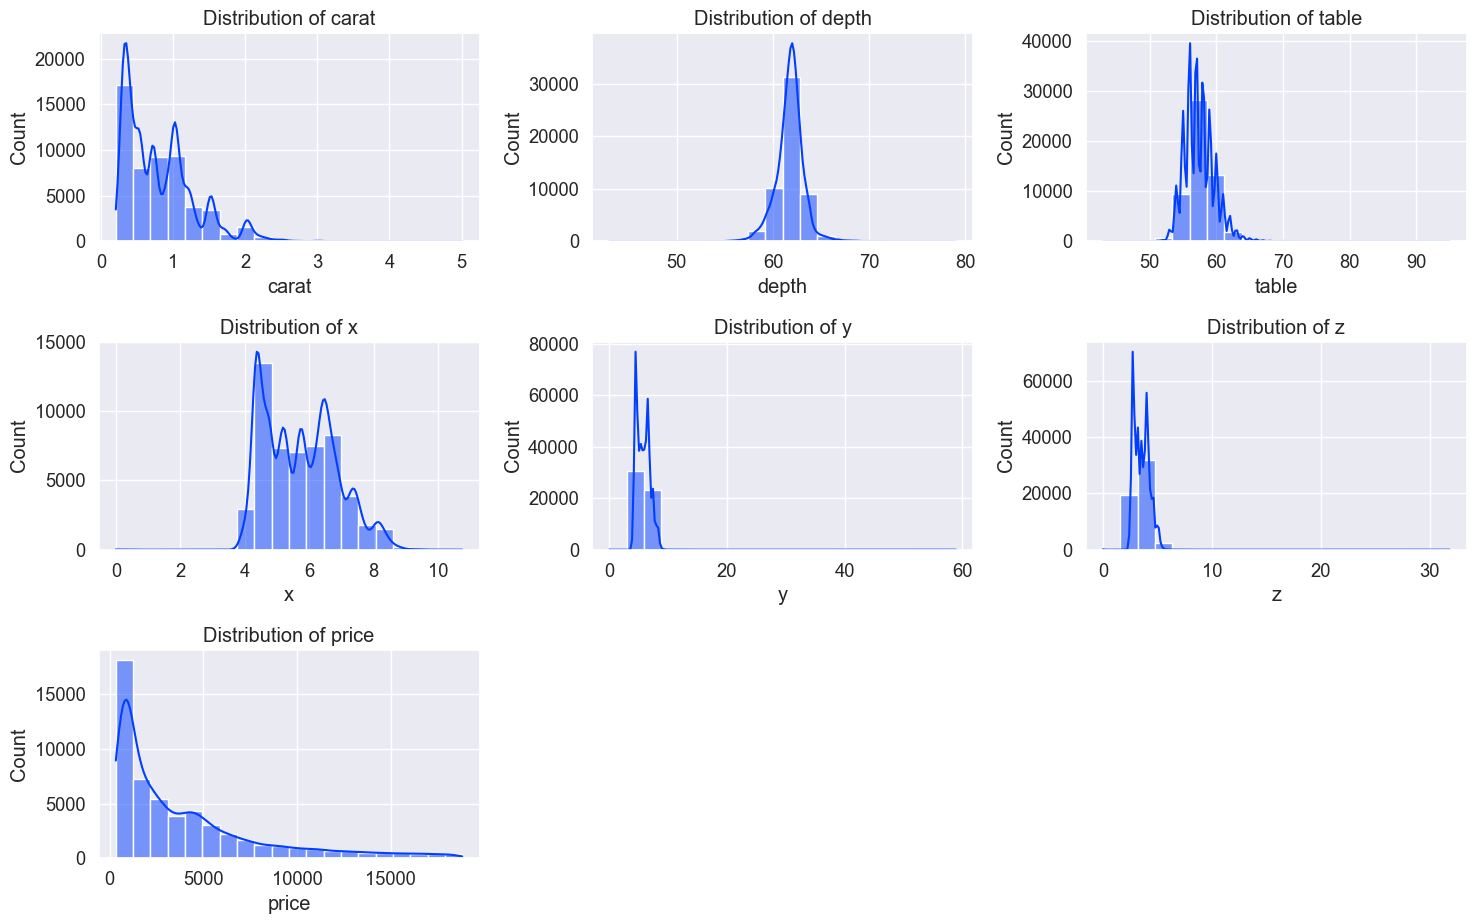

In [15]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(4, 3, i+1)
    sns.histplot(df, x = col, kde=True, bins=20)
    plt.tight_layout()
    plt.title(f'Distribution of {col}')
    # plt.show()


* The price is log normaly distributed.
* The depth has high kurtosis.
* Rest other features have bimodal distributions.

In [16]:
df.describe()

carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  
max       31.800000  18823.000000

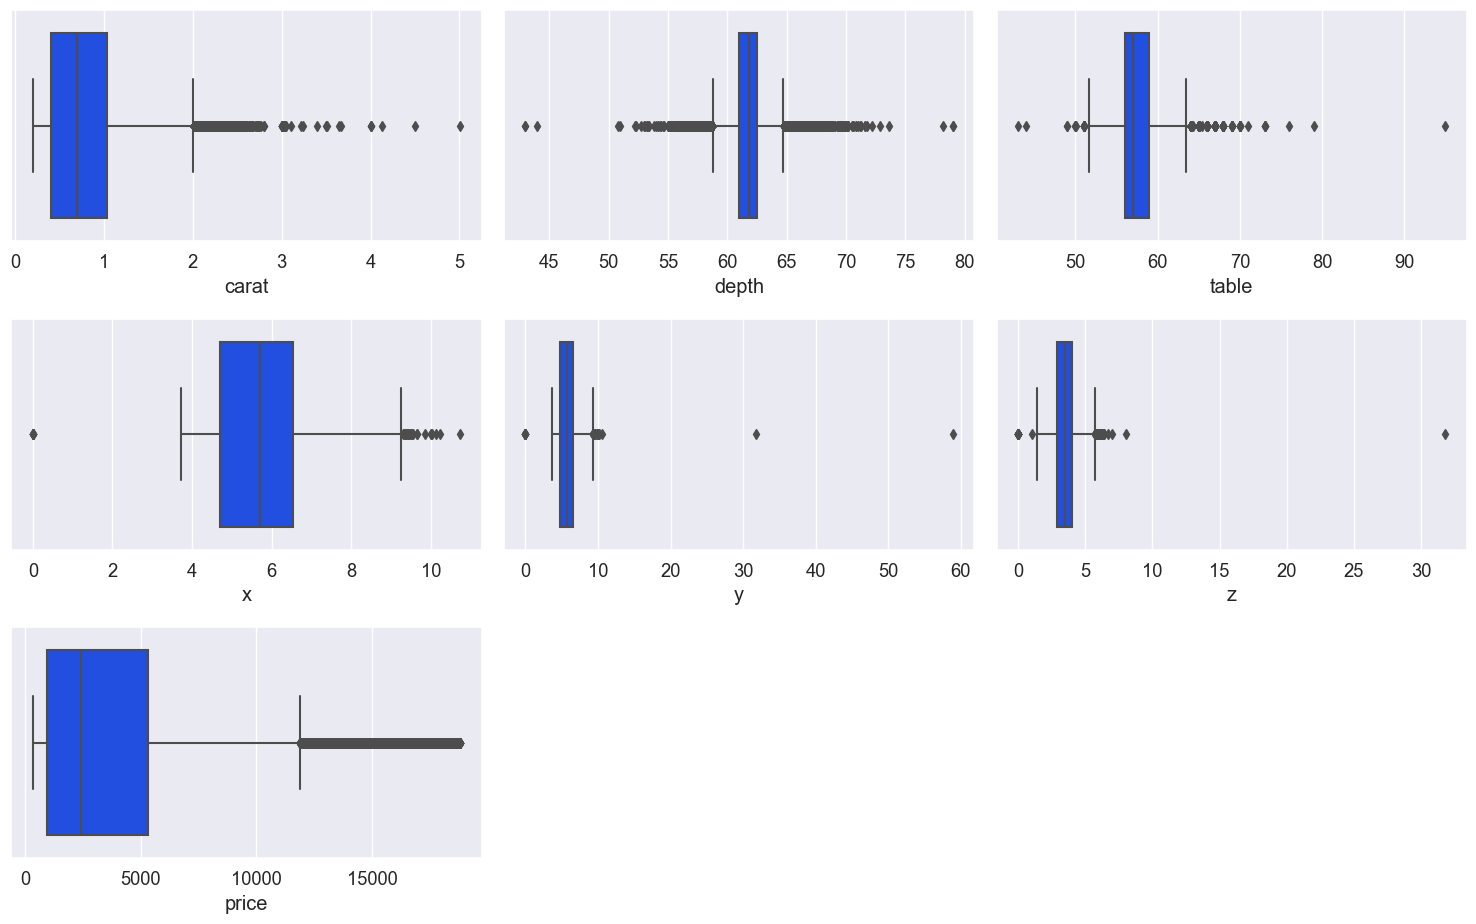

In [17]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data= df, x = col)
    plt.tight_layout()

* All the features have outliers thus median would be a good metric for central tendency.

In [18]:
for i, col in enumerate(df.select_dtypes(exclude='object')):
    print(df[col].value_counts())

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64
4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
10.74      1
9.36       1
8.89       1
10.23      1
10.00      1
Name: x, Length: 554, dtype: int64
4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
        ... 
8.89       1
10.16      1
9.46       1
9.63       1
31.80      1
Name: y, Length: 552, dtype: int64
2.70     767
2.69     748
2.71     738
2.68     730
2.72     697
        ... 
5.79       1
5.72   

* None of the column starts with 0 or negative value thus we can apply log transformation as per the requirement

# Bivariate Analysis

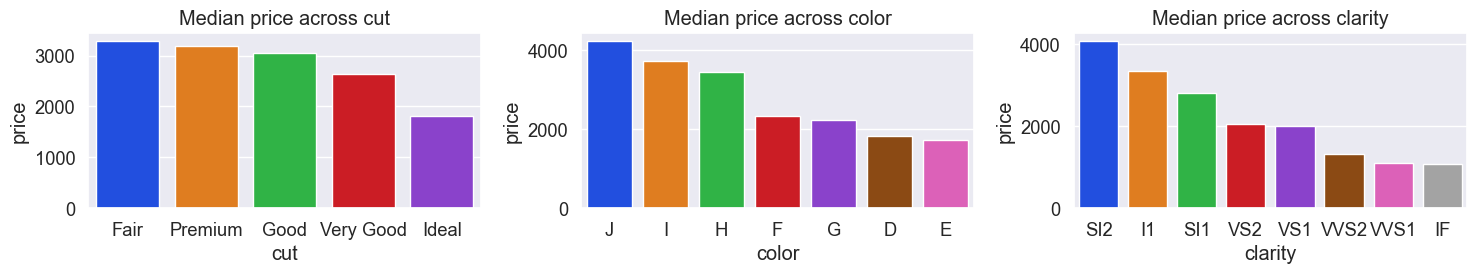

In [19]:
# plt.figure(figsize=(12, 10))
for i, col in enumerate(df.select_dtypes(include='object')):
    plt.subplot(4, 3, i+1)
    sns.barplot(data=df, x = col , y='price', order=df.groupby(col).median().price.sort_values(ascending=False).index, estimator=np.median, ci=False)
    plt.title(f'Median price across {col}')
    plt.tight_layout()

* Fair cut diamonds has highest median price followed by premium cut followed by good cut.
* J colored diamonds has highest median price followed by I colored followed by H colored where as E colored diamonds have the least median price.
* SI2 clarity diamond has highest median price followed by I1 followed, by SI1 clarity followed  where as IF colored diamonds has least median price.

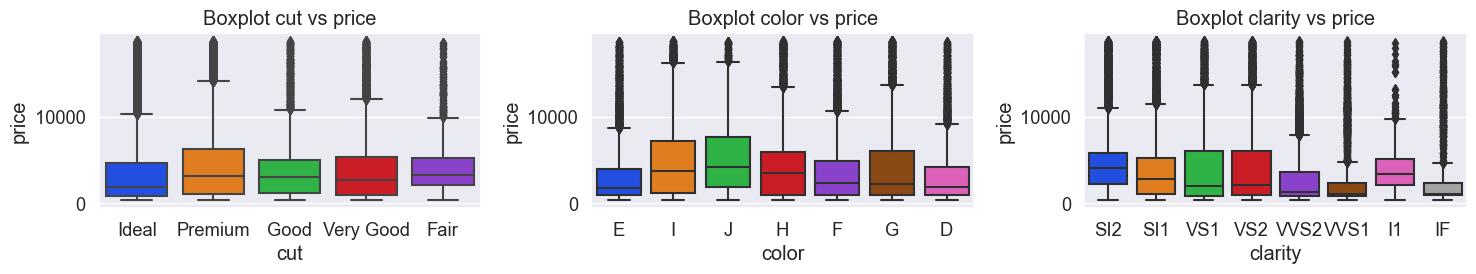

In [20]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.select_dtypes(include='object')):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data= df, x = col, y = 'price')
    plt.title(f'Boxplot {col} vs price')
    plt.tight_layout()

<AxesSubplot:xlabel='x', ylabel='price'>

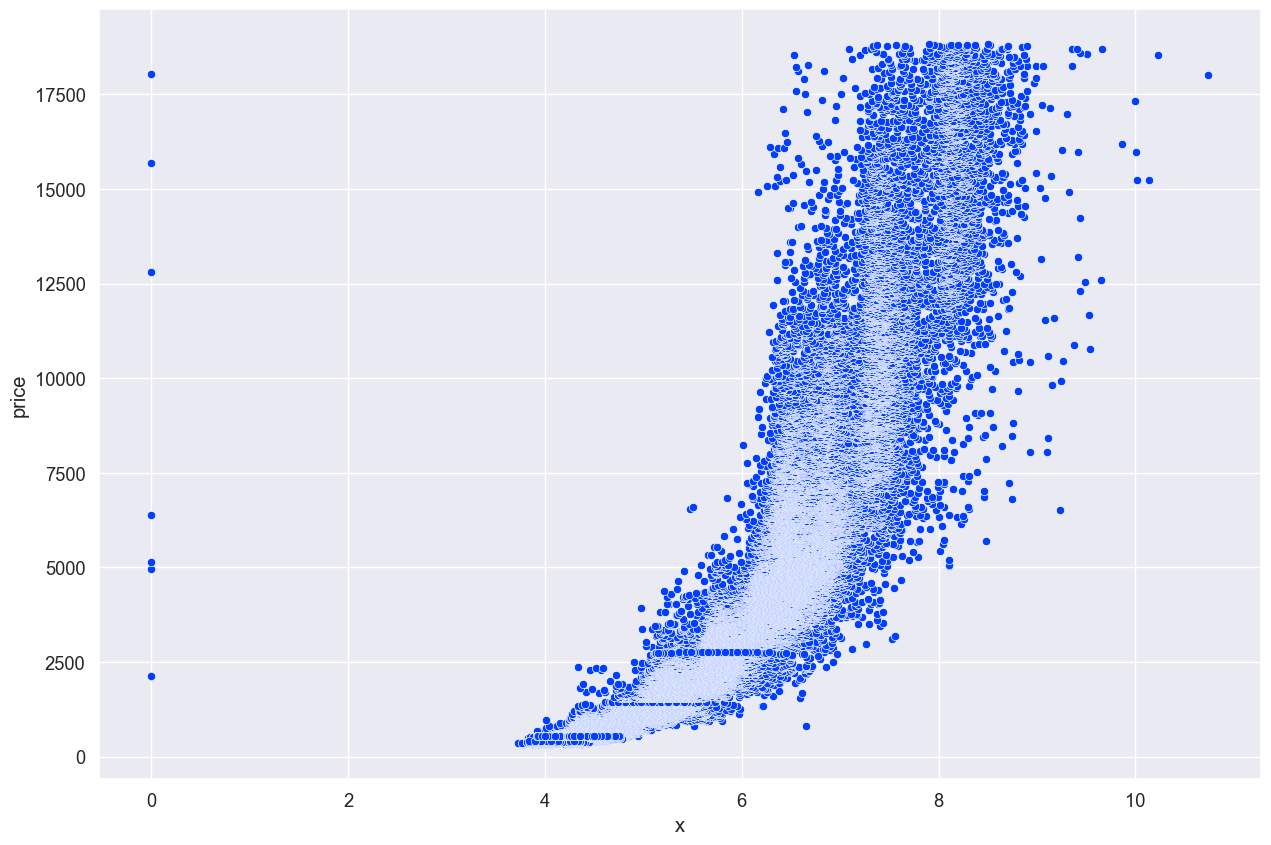

In [21]:
# px.scatter_3d(df, x='x', y='y', z='price')
sns.scatterplot(data=df, x='x', y='price')

* There are  many datapoints where x is 0 and y is 0 but the price is high.

In [22]:
px.scatter(df, 'depth', 'price', facet_col='clarity', width=1000, height=700, facet_col_wrap=3)

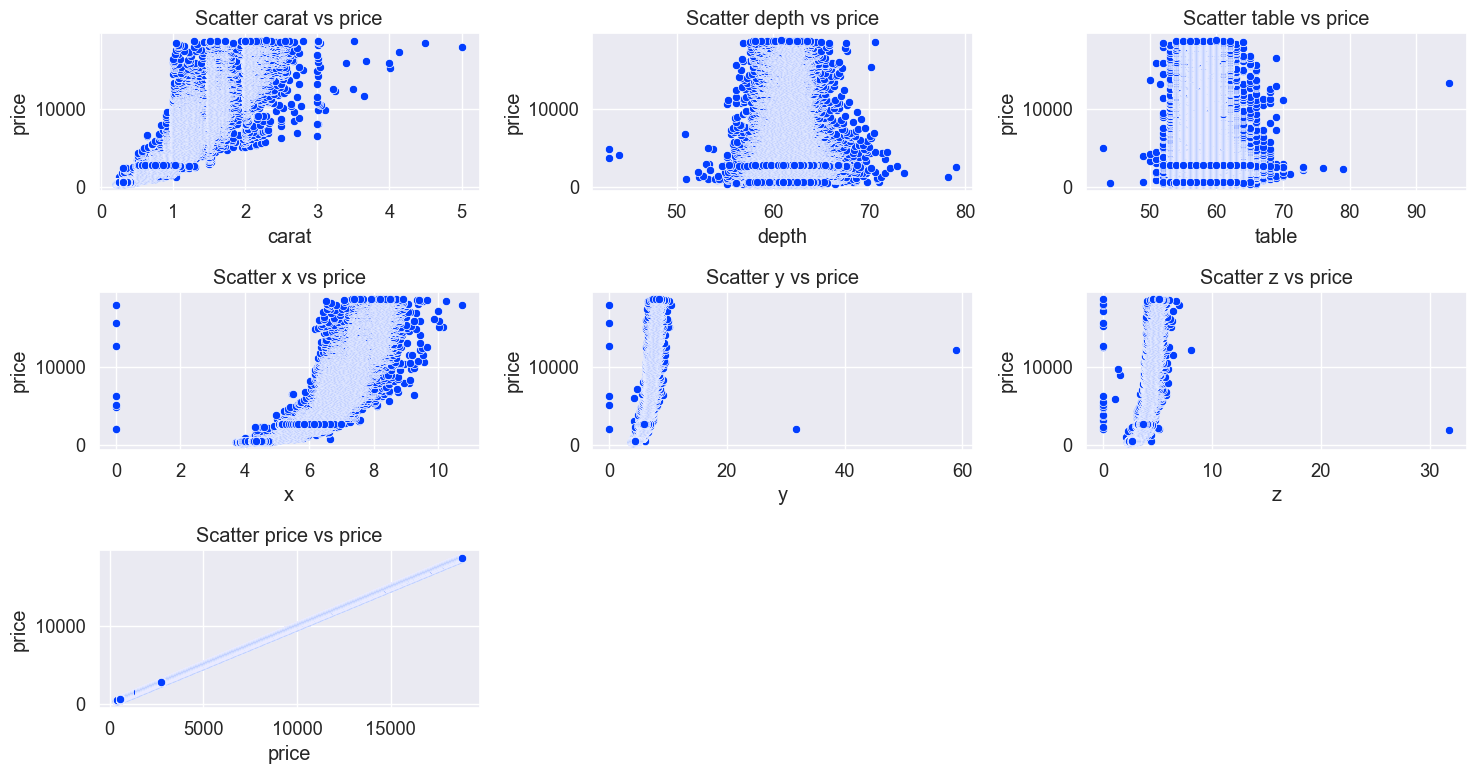

In [23]:
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data= df, x = col, y = 'price',palette='muted')
    plt.title(f'Scatter {col} vs price')
    plt.tight_layout()


* Carat has good correlation with price
* X has good correlation with price

In [24]:
data = df.sample(frac= 0.02)

# Feature Engineering

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split


In [26]:
data = df.sample(frac=1)

In [27]:
df

carat        cut color clarity  depth  table     x     y     z  price
0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50   2757
53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61   2757
53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56   2757
53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74   2757
53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64   2757

[53940 rows x 10 columns]

In [28]:
X = data.drop(['price', 'y', 'z', 'depth', 'table'], axis=1)
y = data.price

In [29]:
# Performing the test train split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, random_state=45, train_size=.7)

In [30]:
# segregating categorical columns and numerical columns
X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(exclude='object')
X_test_cat = X_test.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(exclude='object')


In [31]:
# Label encoding
from category_encoders.ordinal import OrdinalEncoder
oe = OrdinalEncoder()
X_train_oe = X_train_cat.copy()
X_test_oe = X_test_cat.copy()

X_train_oe = oe.fit_transform(X_train_cat)
X_test_oe = oe.transform(X_test_cat)

In [32]:
X_train_cat

cut color clarity
31305      Ideal     E     VS1
12148    Premium     D     VS2
25903      Ideal     H     SI1
41455       Good     E     SI2
14403    Premium     H     VS1
...          ...   ...     ...
52635  Very Good     F    VVS2
7299     Premium     E     SI2
33462    Premium     F     VS2
51781      Ideal     G    VVS2
4468       Ideal     D     VS1

[37758 rows x 3 columns]

In [33]:
# Standard scaling of numerical columns
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train_num), columns=X_train_num.columns, index= X_train_num.index)
X_test_sc = pd.DataFrame(sc.transform(X_test_num), columns=X_test_num.columns, index= X_test_num.index)


In [34]:
# combining categorical columns and numerical columns after preprocessing
X_train_proc = pd.concat([X_train_sc, X_train_oe], axis=1)
X_test_proc = pd.concat([X_test_sc, X_test_oe], axis=1)


In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Converting to array for putting in the algorithm
X_train_arr = np.array(X_train_proc)
X_test_arr = np.array(X_test_proc)
train_labels_arr= np.array(train_labels)
test_labels_arr = np.array(test_labels)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [37]:
lr = LinearRegression()
dr = DecisionTreeRegressor(max_depth=7)
knn= KNeighborsRegressor()
rf = RandomForestRegressor()

models = [lr, dr, knn, rf]
names = ['Linear regression', 'Decisiontree regression', 'K Neighbors regression', 'Random forest regression']
output = pd.DataFrame({'name':[], 'Mape_test':[], 'Mape_train':[], 'RMSE_test':[], 'RMSE_train':[]})

for i, model in enumerate(models):
    model.fit(X_train_proc, train_labels)
    a= mean_absolute_percentage_error(test_labels, model.predict(X_test_proc))
    b= mean_absolute_percentage_error(train_labels, model.predict(X_train_proc))
    c= mean_squared_error(test_labels, model.predict(X_test_proc), squared=False)
    d= mean_squared_error(train_labels, model.predict(X_train_proc), squared=False)

    output = output.append({'name': names[i], 'Mape_test':a, 'Mape_train':b, 'RMSE_test':c, 'RMSE_train':d}, ignore_index=True)

In [38]:
round(output,2)

name  Mape_test  Mape_train  RMSE_test  RMSE_train
0         Linear regression       0.31        0.31    1487.07     1507.38
1   Decisiontree regression       0.14        0.13     877.03      838.11
2    K Neighbors regression       0.09        0.07     638.84      522.44
3  Random forest regression       0.08        0.04     588.99      245.65

In [39]:
from pickle import dump

In [40]:
dump(dr, open(basedir+'/pages/data/decision_tree.pkl', 'wb'))
dump(sc, open(basedir+'/pages/data/std_scaler.pkl', 'wb'))
dump(oe, open(basedir+'/pages/data/ordinal_encoder.pkl', 'wb'))

In [41]:
X_train_proc

carat         x  cut  color  clarity
31305 -1.005896 -1.202831    1      1        1
12148  0.423887  0.568153    2      2        2
25903  2.169062  1.903066    1      3        3
41455 -0.585372 -0.517576    3      1        4
14403  0.592096  0.986426    2      3        1
...         ...       ...  ...    ...      ...
52635 -1.174106 -1.567708    4      5        5
7299   0.423887  0.701644    2      1        4
33462 -1.005896 -1.113837    2      5        2
51781 -0.417162 -0.259493    1      6        5
4468  -0.164847  0.060886    1      2        1

[37758 rows x 5 columns]

In [42]:
carat = float(input())
x = float(input())
cut= input()
color=input()
clarity=input()

In [43]:
from pickle import load

In [44]:
querry_num = [[carat, x]]
querry_cat = pd.DataFrame({'cut':[cut], 'color':[color], 'clarity': [clarity]})

In [45]:
sc_open = load(open(basedir+'/pages/data/std_scaler.pkl', 'rb'))
dt_open = load(open(basedir+'/pages/data/decision_tree.pkl', 'rb'))
oe_open = load(open(basedir+'/pages/data/ordinal_encoder.pkl', 'rb'))

In [46]:
querry_cat

cut color clarity
0  Premium     D     VS2

In [47]:
querry_num

[[2.0, 3.0]]

In [48]:
querry_num = sc_open.transform(querry_num)

In [49]:
querry_cat = oe_open.transform(querry_cat)

In [50]:
querry_num

array([[ 2.52650785, -2.43095132]])

In [51]:
np.array(querry_cat)

array([[2, 2, 2]])

In [52]:
querry_cat.values

array([[2, 2, 2]])

In [53]:
querry_point = pd.concat([pd.DataFrame(querry_num), querry_cat], axis=1)

In [54]:
querry_point

0         1  cut  color  clarity
0  2.526508 -2.430951    2      2        2

In [55]:
dt_open.predict(querry_point)

array([15342.52272727])